In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats 
import numpy as np
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The following describes the dataset variables:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's


For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

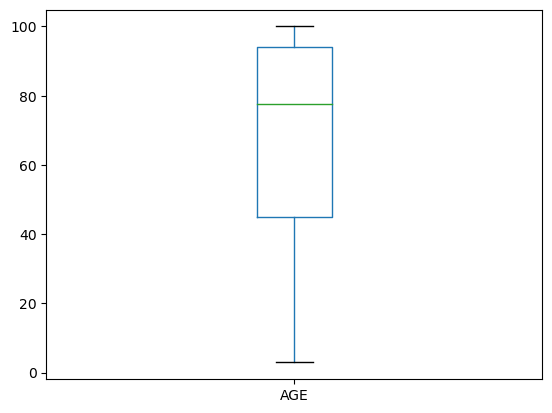

In [5]:
#     For the "Median value of owner-occupied homes" provide a boxplot
boston_df[['AGE']].boxplot( grid = False)
# boston_df.boxplot(column =['AGE'], grid = False) 
plt.show()

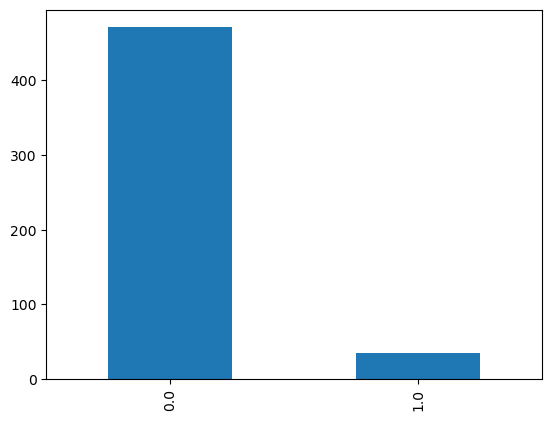

In [6]:
# Provide a  bar plot for the Charles river variable
boston_df['CHAS'].value_counts().plot.bar()
plt.show()

Provide a boxplot for the MEDV variable vs the AGE variable.

In [7]:
def ageGroup(x):
    if x <= 35:
        y = 'young'
    elif x >= 70:
        y = 'older'
    else:
        y = 'middle'
    return y

In [8]:
boston_df['AGE Group'] = boston_df['AGE'].apply(ageGroup)

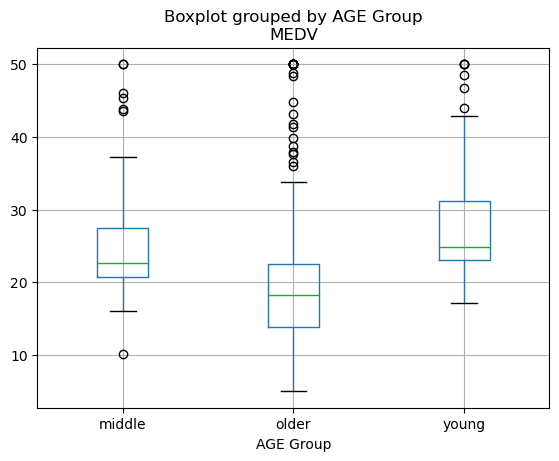

In [9]:
boston_df.boxplot(by='AGE Group', column=['MEDV'])
plt.show()

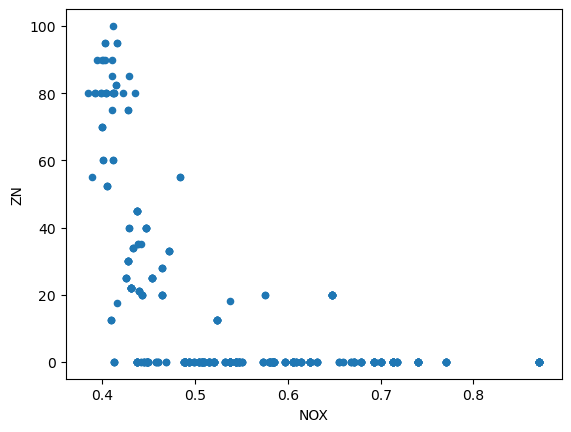

In [10]:
#  Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship
boston_df.plot.scatter(x='NOX', y='ZN')
plt.show()

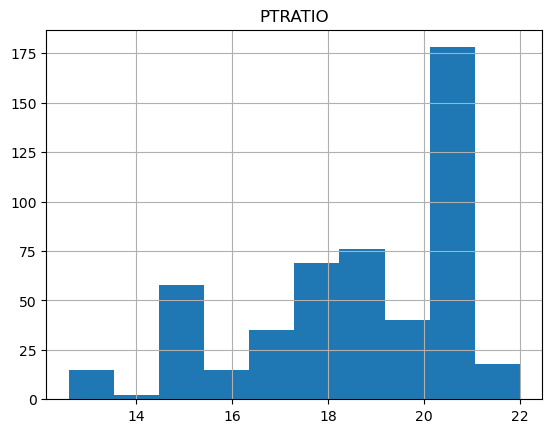

In [11]:
# Create a histogram for the pupil to teacher ratio variable
boston_df[['PTRATIO']].hist()
plt.show()

State the hypothesis

H0:µ1=µ2
  ("there is no difference in median value between Charles river 1/0")
H1:µ1≠µ2
  ("there is a difference in median value between Charles river 1/0")

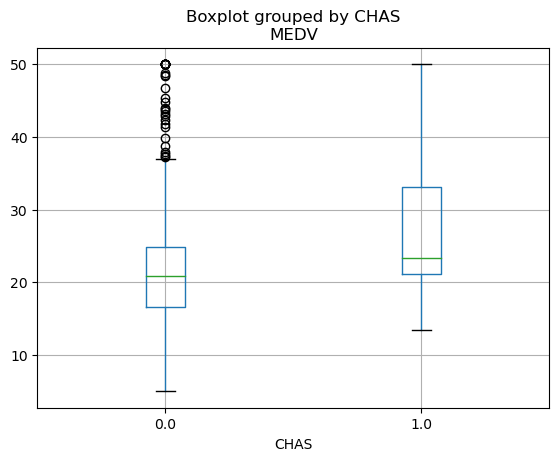

In [12]:
boston_df.boxplot(by='CHAS', column=['MEDV'])
plt.show()

In [13]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'] , center='mean')


LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

since the p-value is not greater than 0.05 we reject the equality of variance


In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'],equal_var=False)


Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value based on Charles river parameter



Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



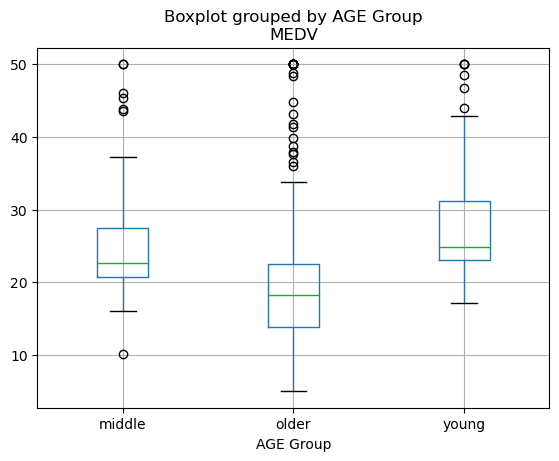

In [15]:
boston_df.boxplot(by='AGE Group', column=['MEDV'])
plt.show()

State the hypothesis

H0:µ1=µ2=µ3
  (the three population means are equal)

H1:
  At least one of the means differ

In [16]:
young_age = boston_df[boston_df['AGE Group'] == 'young']['MEDV']
middle_age = boston_df[boston_df['AGE Group'] == 'middle']['MEDV']
older_age = boston_df[boston_df['AGE Group'] == 'older']['MEDV']

In [17]:
# Now, run a one-way ANOVA.
f_statistic, p_value = scipy.stats.f_oneway(young_age, middle_age, older_age)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.



Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



State the hypothesis:

H0:
  Not correlated
H1:
  Correlated NOX & ZN

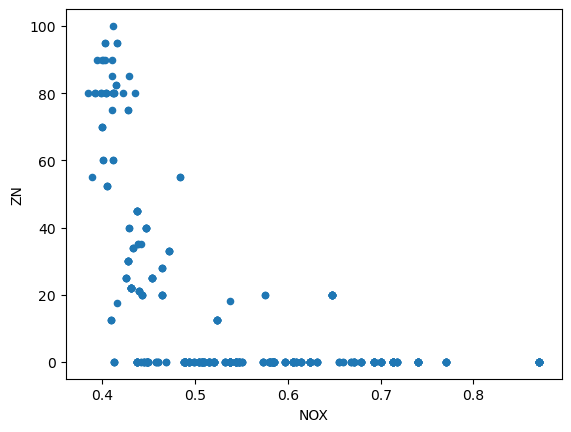

In [19]:
boston_df.plot.scatter(x='NOX', y='ZN')
plt.show()

In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['ZN'])


PearsonRResult(statistic=-0.5166037078279841, pvalue=7.23157821808826e-36)

Conclusion: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and ZN



Q4: • What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)



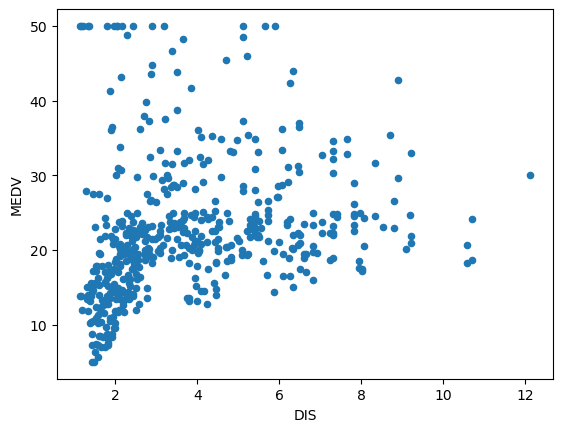

In [21]:
boston_df.plot.scatter(x = 'DIS', y='MEDV')
plt.show()

In [22]:
import statsmodels.api as sm


In [23]:
model = sm.OLS(boston_df['MEDV'], boston_df['DIS']).fit()


In [24]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):                   1.52e-146
Time:                        09:24:57   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis

